In [30]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams["figure.figsize"] = [6.4, 4.8]
from datetime import datetime

In [31]:
data = pd.read_csv(r"C:/Users/piyus/Desktop/Review 2/imuf.csv")
data.shape
# parsing string to a date time type
data['months']=pd.to_datetime(data['months'], infer_datetime_format=True)
data=data.set_index(['months'])
print(data)

            total gallons
months                   
2012-01-01       27669600
2012-01-02       25344600
2012-01-03       27141200
2012-01-04       33087800
2012-01-05       56310700
...                   ...
2018-01-05       73609100
2018-01-06      108484900
2018-01-07      115949600
2018-01-08      141792700
2018-01-09      138102700

[81 rows x 1 columns]


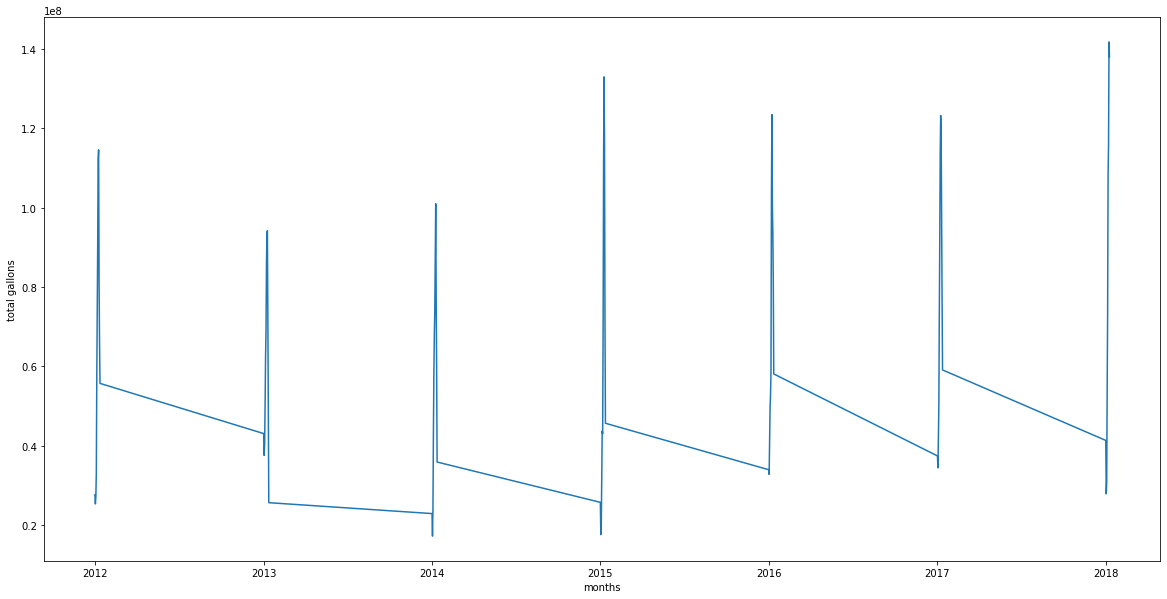

In [32]:
# Plotting Graph
plt.figure(figsize=(20,10))
plt.xlabel("months")
plt.ylabel("total gallons")
plt.plot(data)

In [33]:
# Determining Rolling Statistics
rolmean=data.rolling(window=12).mean()
rolstd=data.rolling(window=12).std()
print(rolmean)
print(rolstd)

            total gallons
months                   
2012-01-01            NaN
2012-01-02            NaN
2012-01-03            NaN
2012-01-04            NaN
2012-01-05            NaN
...                   ...
2018-01-05   7.578622e+07
2018-01-06   7.715497e+07
2018-01-07   7.734508e+07
2018-01-08   7.889123e+07
2018-01-09   8.050355e+07

[81 rows x 1 columns]
            total gallons
months                   
2012-01-01            NaN
2012-01-02            NaN
2012-01-03            NaN
2012-01-04            NaN
2012-01-05            NaN
...                   ...
2018-01-05   3.379793e+07
2018-01-06   3.483362e+07
2018-01-07   3.505653e+07
2018-01-08   3.758280e+07
2018-01-09   3.979816e+07

[81 rows x 1 columns]


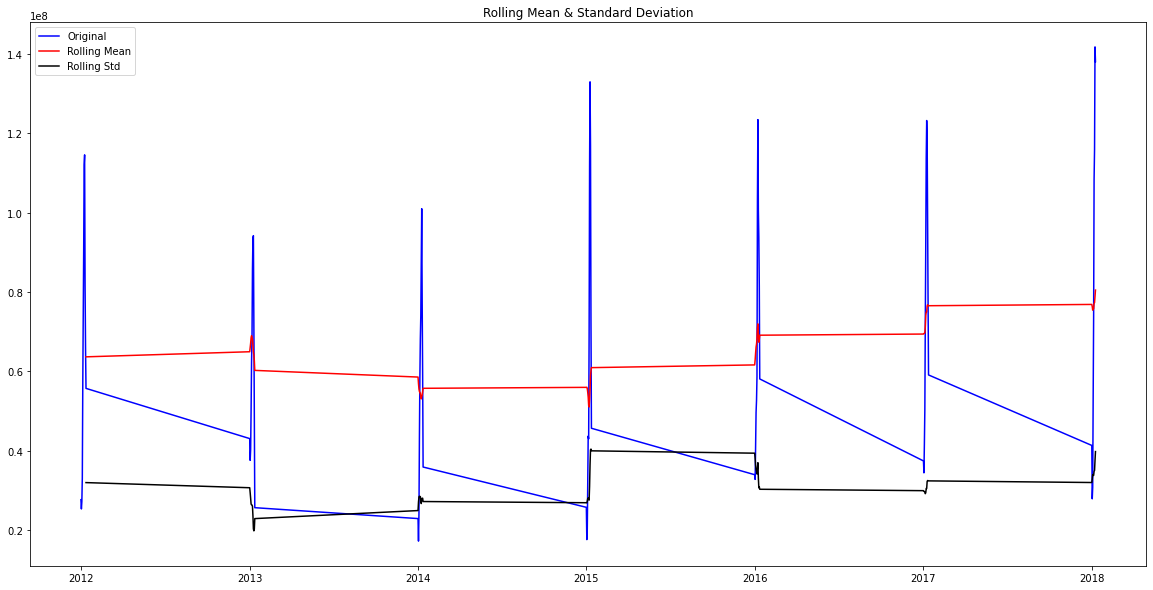

In [34]:
# plotting rolling stastics
plt.figure(figsize=(20,10))
original=plt.plot(data, color='blue', label='Original')
mean_6=plt.plot(rolmean, color='red', label='Rolling Mean') 
std_6=plt.plot(rolstd, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [35]:
# Performing Dickey Fuller Test
from statsmodels.tsa.stattools import adfuller
print('Results For Dickey-Fuller Test: ')
dftest=adfuller(data['total gallons'], autolag='AIC')
dfoutput=pd.Series(dftest[0:4], index=['Test Statistic','p-value','Lags Used','No. of Obs'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Results For Dickey-Fuller Test: 
Test Statistic          -0.171951
p-value                  0.941783
Lags Used               10.000000
No. of Obs              70.000000
Critical Value (1%)     -3.527426
Critical Value (5%)     -2.903811
Critical Value (10%)    -2.589320
dtype: float64


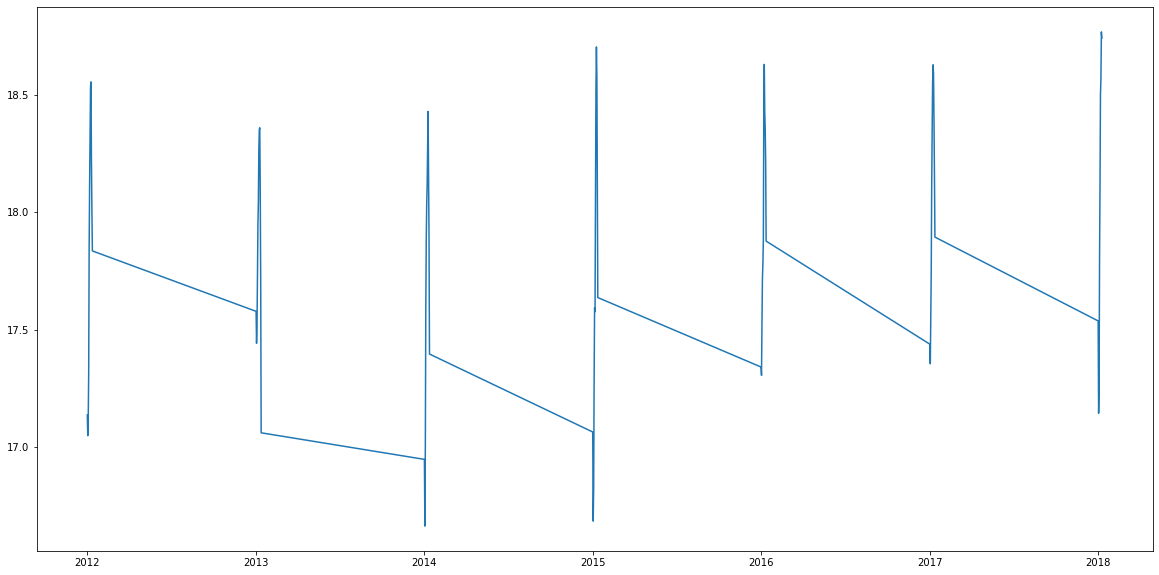

In [36]:
# Estimating Trends
plt.figure(figsize=(20,10))
data_log=np.log(data)
plt.plot(data_log)

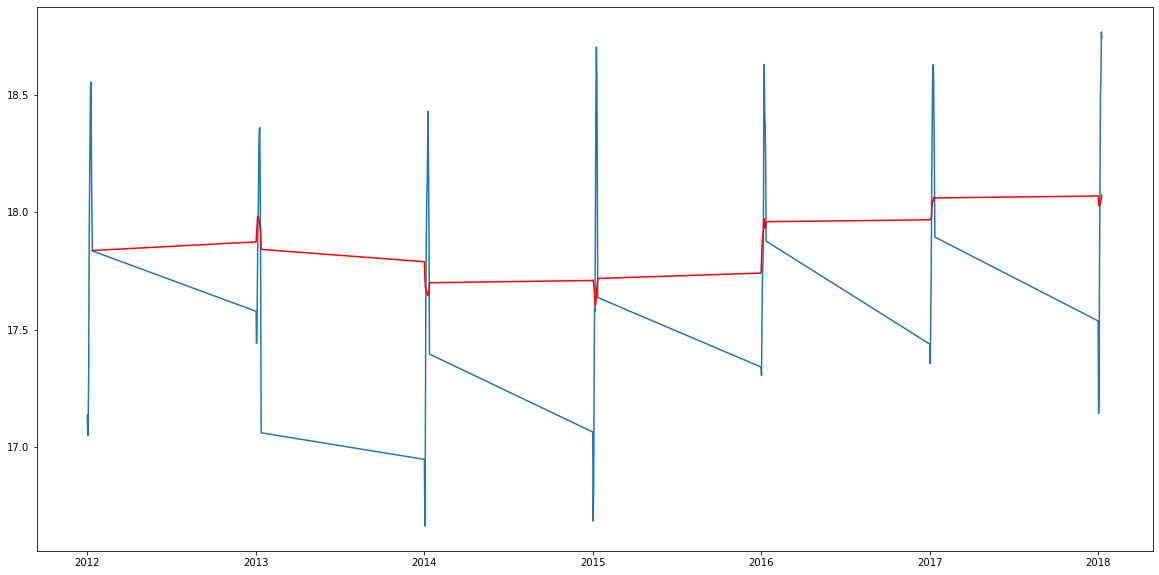

In [37]:
plt.figure(figsize=(20,10))
MAvg=data_log.rolling(window=12).mean()
MStd=data_log.rolling(window=12).std()
plt.plot(data_log)
plt.plot(MAvg, color='red')

In [38]:
data_log_diff=data_log-MAvg
data_log_diff.head(12)

data_log_diff=data_log_diff.dropna()
data_log_diff.head()

,total gallons
months,
2012-01-12,-0.001747
2013-01-01,-0.296182
2013-01-02,-0.465284
2013-01-03,-0.427836
2013-01-04,-0.244433


In [39]:
def stationarity(timeseries):
    
    rolmean=timeseries.rolling(window=12).mean()
    rolstd=timeseries.rolling(window=12).std()
    
    plt.figure(figsize=(20,10))
    actual=plt.plot(timeseries, color='blue', label='original')
    mean_6=plt.plot(rolmean, color='red', label='Rolling Mean') 
    std_6=plt.plot(rolstd, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    print('Dickey-Fuller Test: ')
    dftest=adfuller(timeseries['total gallons'], autolag='AIC')
    dfoutput=pd.Series(dftest[0:4], index=['Test Statistic','p-value','Lags Used','No. of Obs'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

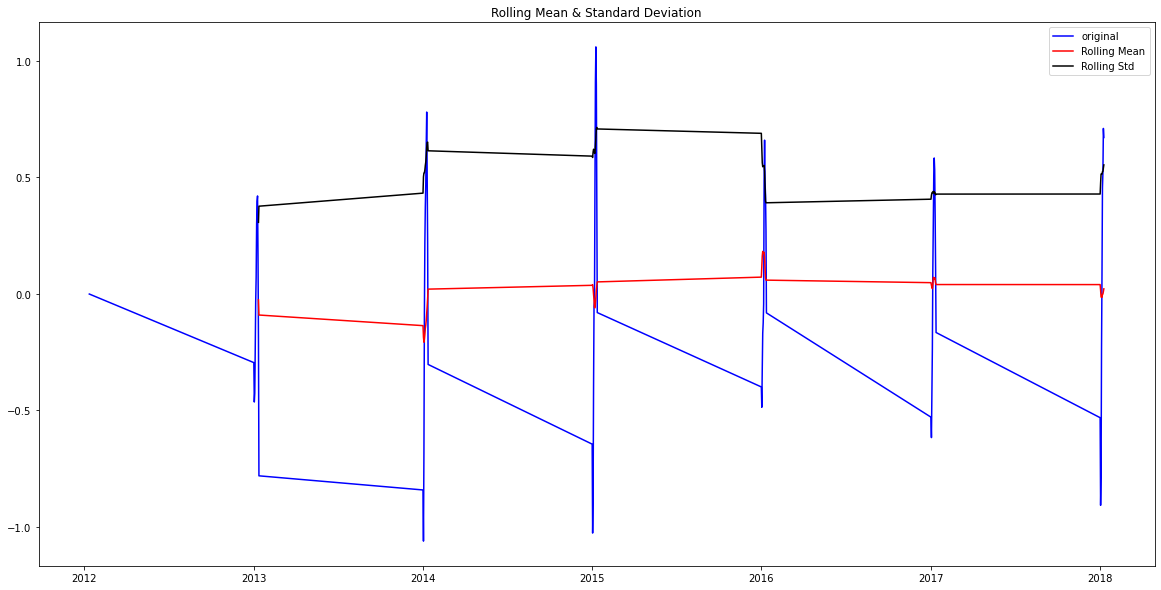

Dickey-Fuller Test: 
Test Statistic         -6.906080e+00
p-value                 1.246282e-09
Lags Used               4.000000e+00
No. of Obs              6.500000e+01
Critical Value (1%)    -3.535217e+00
Critical Value (5%)    -2.907154e+00
Critical Value (10%)   -2.591103e+00
dtype: float64


In [40]:
stationarity(data_log_diff)

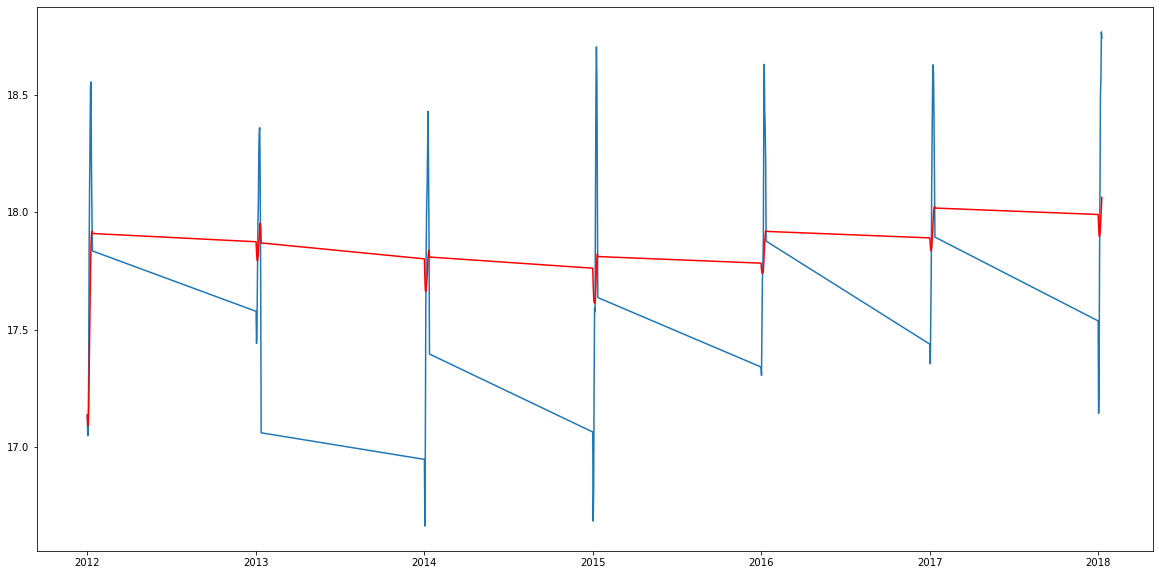

In [41]:
plt.figure(figsize=(20,10))
exp_data=data_log.ewm(halflife=12, min_periods=0, adjust=True).mean()
plt.plot(data_log)
plt.plot(exp_data, color='red')

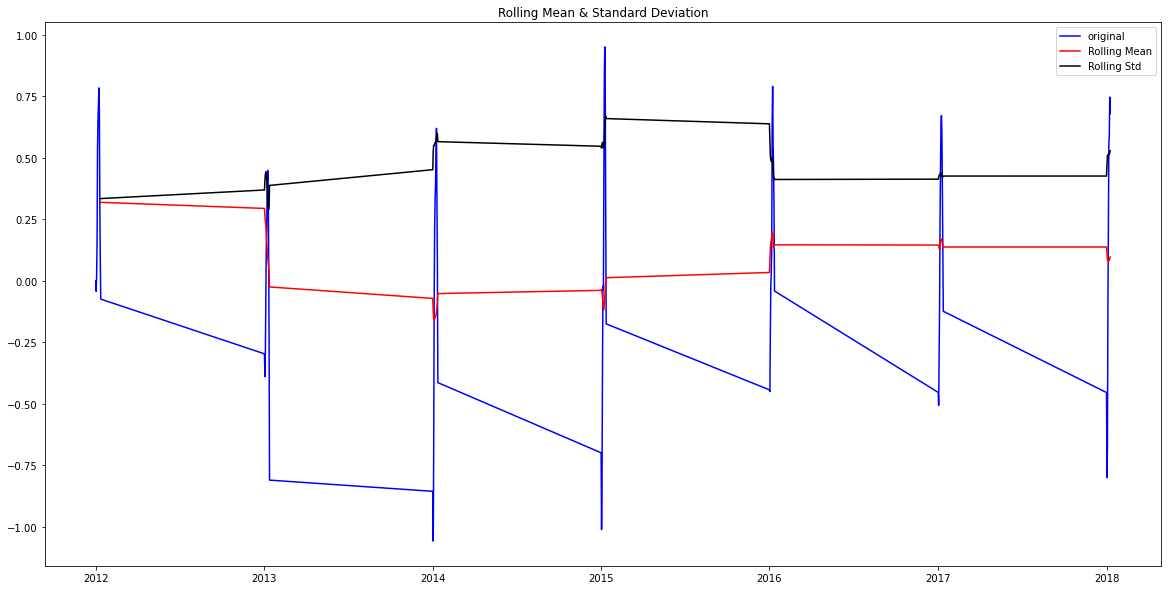

Dickey-Fuller Test: 
Test Statistic          -1.949325
p-value                  0.309224
Lags Used                9.000000
No. of Obs              71.000000
Critical Value (1%)     -3.526005
Critical Value (5%)     -2.903200
Critical Value (10%)    -2.588995
dtype: float64


In [42]:
exp_data_diff=data_log-exp_data
stationarity(exp_data_diff)

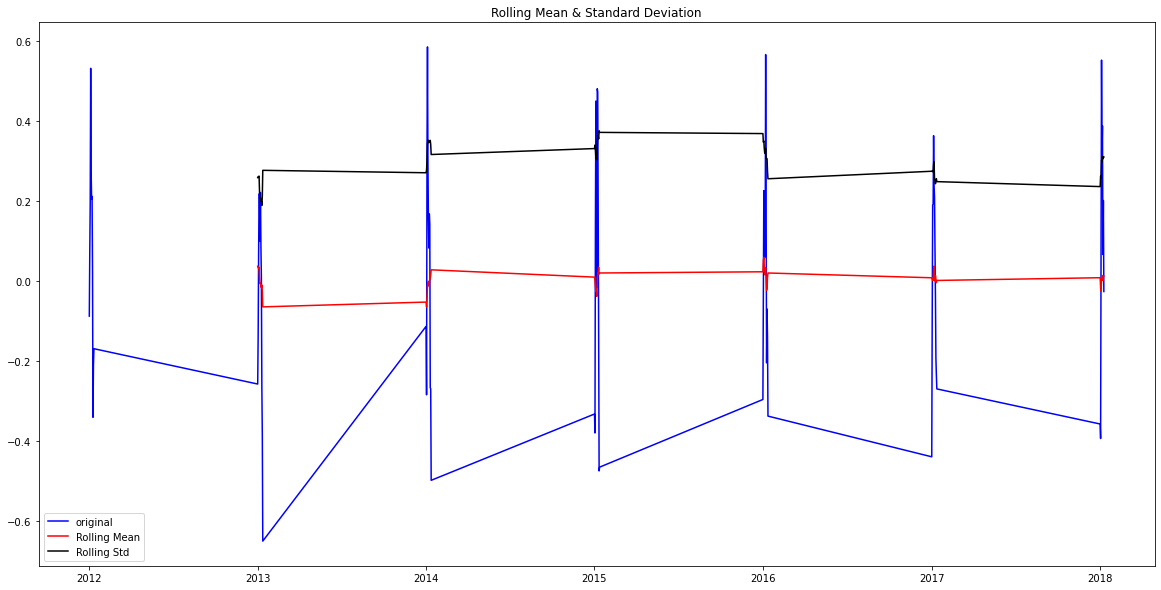

Dickey-Fuller Test: 
Test Statistic         -8.049372e+00
p-value                 1.758878e-12
Lags Used               8.000000e+00
No. of Obs              7.100000e+01
Critical Value (1%)    -3.526005e+00
Critical Value (5%)    -2.903200e+00
Critical Value (10%)   -2.588995e+00
dtype: float64


In [43]:
data_shift=data_log-data_log.shift()

data_shift=data_shift.dropna()
stationarity(data_shift)

In [44]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomp=seasonal_decompose(data_log)

trend=decomp.trend
seasonal=decomp.seasonal
residual=decomp.resid

plt.subplot(411)
plt.plot(data_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

ValueError: You must specify a period or x must be a pandas object with a DatetimeIndex with a freq not set to None

In [45]:
decomp_data=residual
decomp_data=decomp_data.dropna()
stationarity(decomp_data)

NameError: name 'residual' is not defined

C:\Users\piyus\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:662: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


Text(0.5, 1.0, 'Partial Autocorrelation Function')

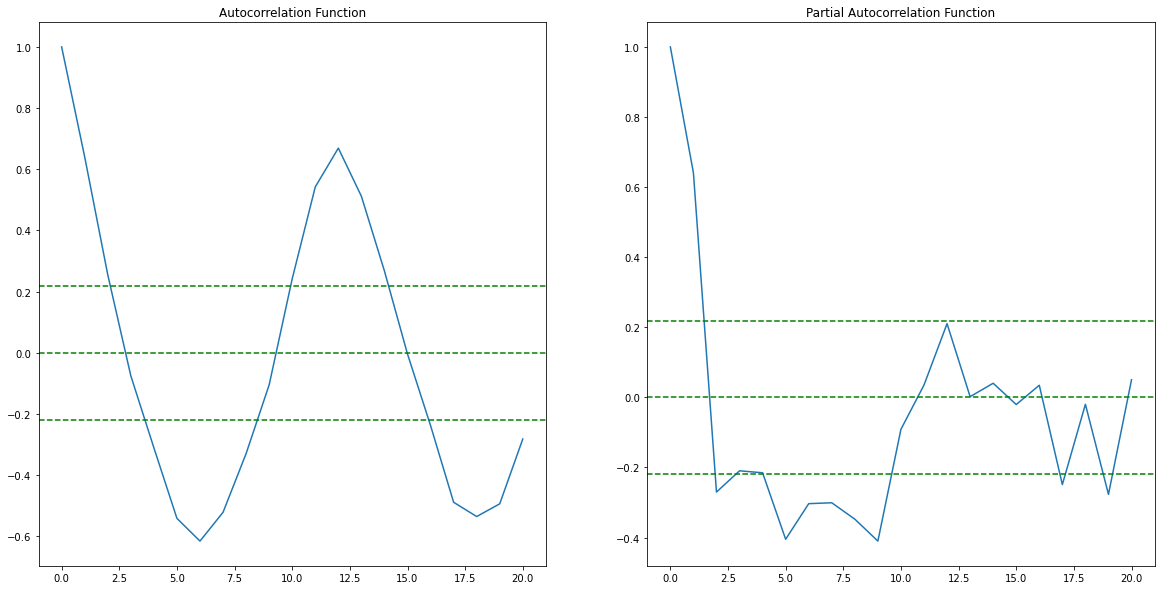

In [46]:
# ARIMA Model
from statsmodels.tsa.stattools import acf, pacf

lag_acf=acf(data_shift, nlags=20)
lag_pacf=pacf(data_shift, nlags=20, method='ols')

plt.figure(figsize=(20,10))
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='green')
plt.axhline(y=-1.96/np.sqrt(len(data_shift)),linestyle='--',color='green')
plt.axhline(y=1.96/np.sqrt(len(data_shift)),linestyle='--',color='green')
plt.title('Autocorrelation Function')

plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='green')
plt.axhline(y=-1.96/np.sqrt(len(data_shift)),linestyle='--',color='green')
plt.axhline(y=1.96/np.sqrt(len(data_shift)),linestyle='--',color='green')
plt.title('Partial Autocorrelation Function')

C:\Users\piyus\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\piyus\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency

plotting ARIMA model


C:\Users\piyus\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


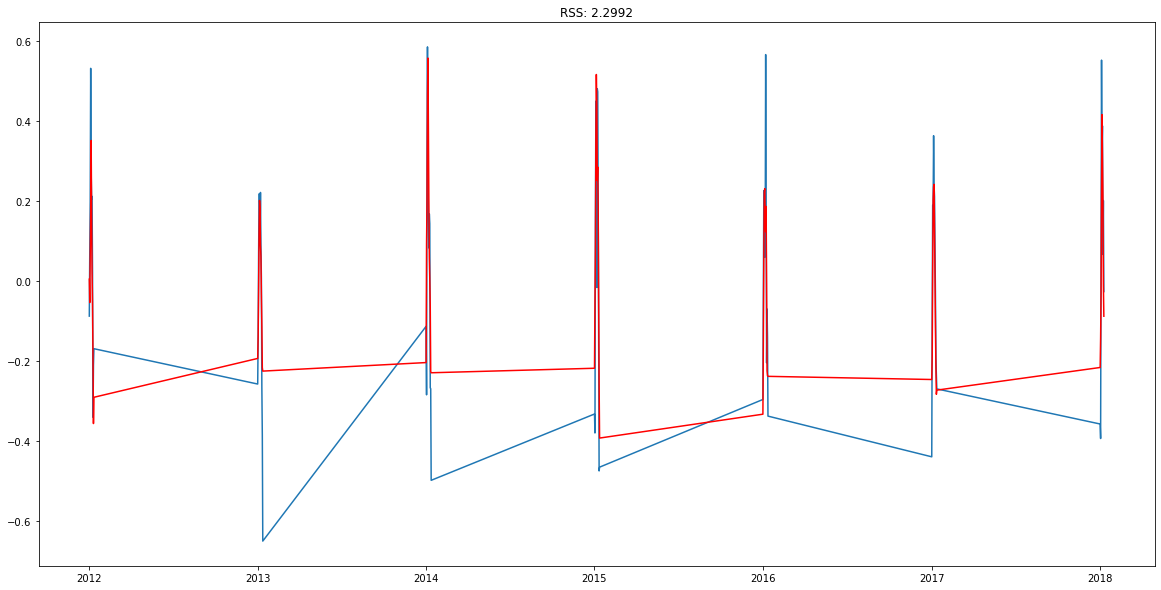

In [47]:
# Arima Model
from statsmodels.tsa.arima_model import ARIMA

plt.figure(figsize=(20,10))
model=ARIMA(data_log, order=(2,1,2))
results=model.fit(disp=-1)
plt.plot(data_shift)
plt.plot(results.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results.fittedvalues-data_shift['total gallons'])**2))
print('plotting ARIMA model')

In [48]:
predictions=pd.Series(results.fittedvalues, copy=True)
print(predictions.head())

months
2012-01-02    0.004612
2012-01-03   -0.053979
2012-01-04    0.069253
2012-01-05    0.173169
2012-01-06    0.351330
dtype: float64


In [49]:
# convert to cumulative sum
predictions_cum_sum=predictions.cumsum()
print(predictions_cum_sum.head())

months
2012-01-02    0.004612
2012-01-03   -0.049367
2012-01-04    0.019886
2012-01-05    0.193056
2012-01-06    0.544385
dtype: float64


In [50]:
predictions_log=pd.Series(data_log['total gallons'], index=data_log.index)
predictions_log=predictions_log.add(predictions_cum_sum,fill_value=0)
predictions_log.head()

months
2012-01-01    17.135845
2012-01-02    17.052688
2012-01-03    17.067196
2012-01-04    17.334561
2012-01-05    18.039451
dtype: float64

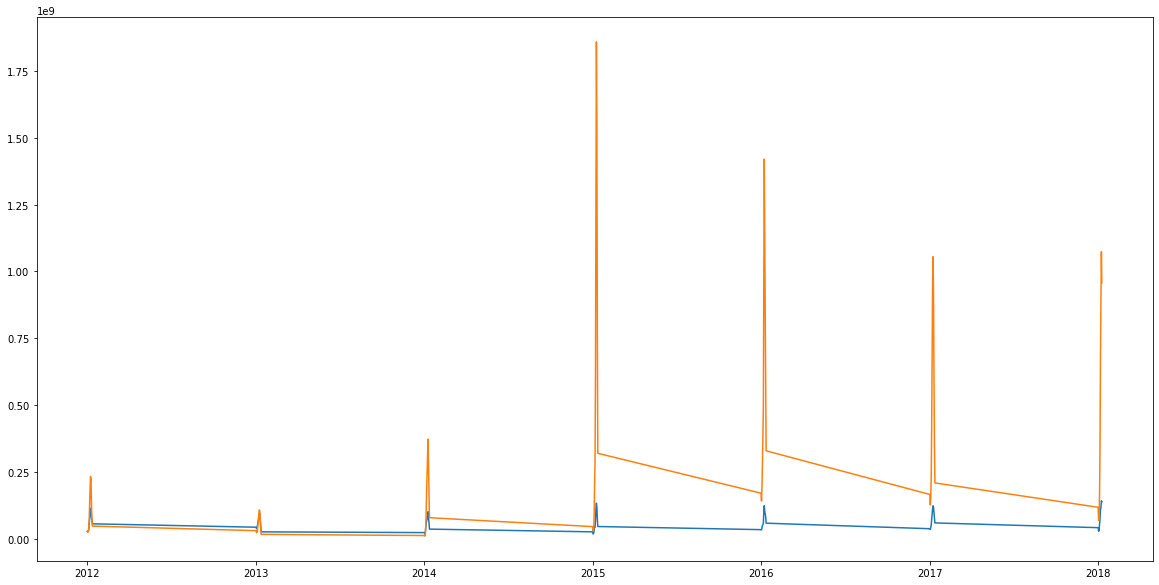

In [51]:

predictions_ARIMA=np.exp(predictions_log)
plt.figure(figsize=(20,10))
plt.plot(data)
plt.plot(predictions_ARIMA)

C:\Users\piyus\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
C:\Users\piyus\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
C:\Users\piyus\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


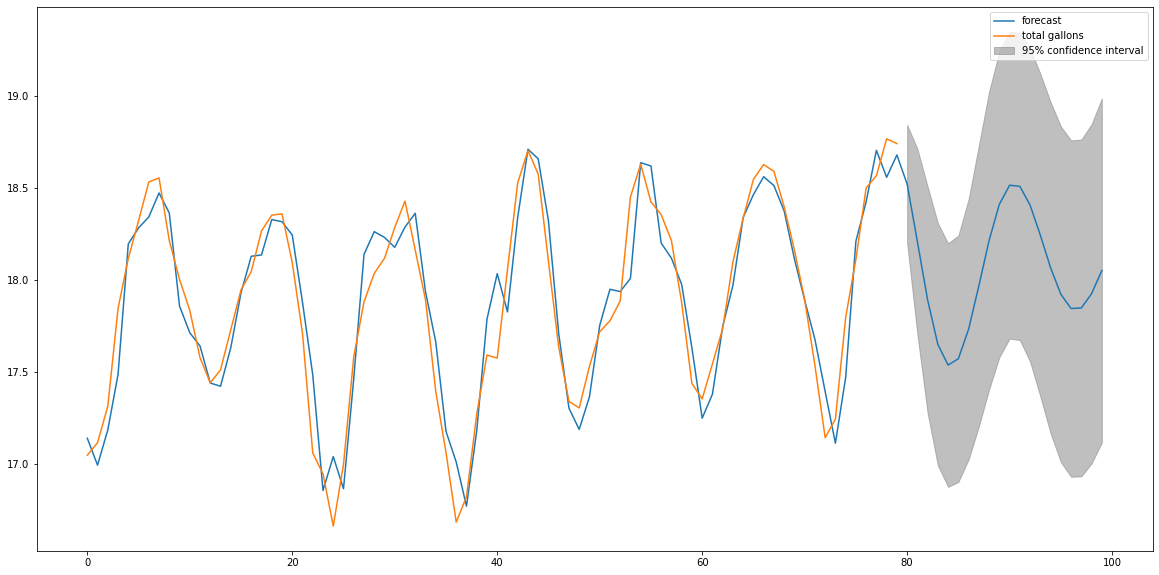

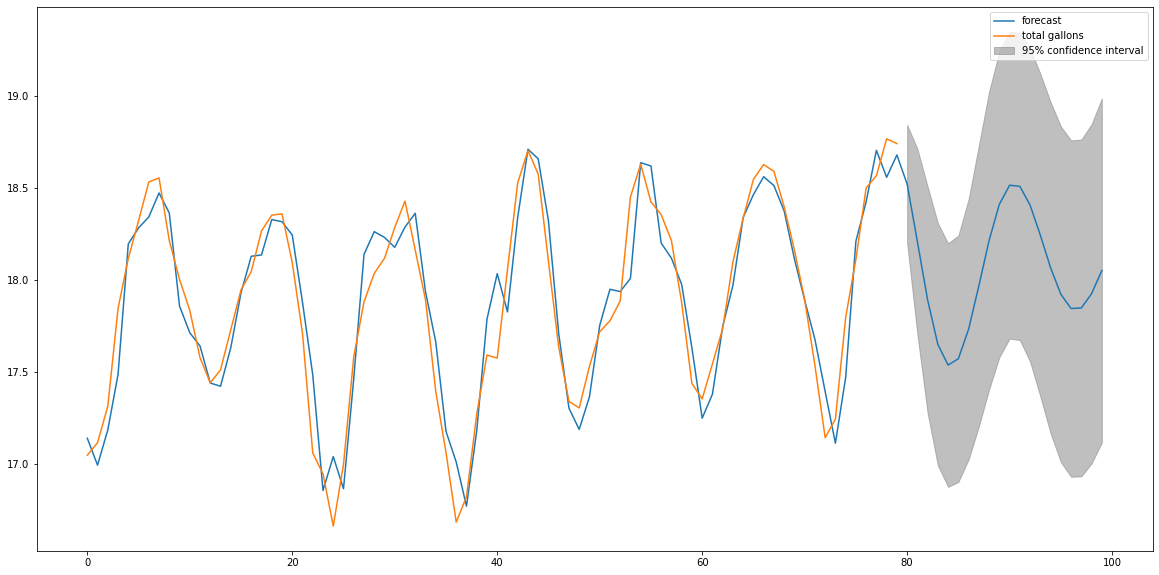

In [52]:

rcParams['figure.figsize']=20,10
results.plot_predict(1,100)

In [53]:
results.forecast(steps=24)

(array([18.52320637, 18.21053424, 17.89288345, 17.65080616, 17.53862752,
        17.57336814, 17.73396172, 17.97001069, 18.21702235, 18.41373996,
        18.51706777, 18.51110319, 18.4085758 , 18.24503746, 18.06791733,
        17.92363659, 17.84616455, 17.84972705, 17.92709563, 18.05336688,
        18.19378522, 18.31329122, 18.38526306, 18.397353  ]),
 array([0.16425253, 0.25771454, 0.31457943, 0.33635379, 0.33804676,
        0.34202153, 0.36145503, 0.39012619, 0.41362237, 0.42433894,
        0.42558131, 0.42678977, 0.43473567, 0.44798321, 0.45996805,
        0.46602963, 0.46697008, 0.46735046, 0.47095549, 0.47759861,
        0.48407392, 0.48764102, 0.48833667, 0.48844327]),
 array([[18.20127732, 18.84513541],
        [17.70542301, 18.71564546],
        [17.2763191 , 18.50944779],
        [16.99156484, 18.31004749],
        [16.87606804, 18.20118701],
        [16.90301827, 18.24371802],
        [17.02552288, 18.44240056],
        [17.2053774 , 18.73464397],
        [17.40633741, 19.027